<a href="https://colab.research.google.com/github/khanhsvan/someCollab/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from itertools import product
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Function to replace 0 with NaN in specific columns
def replace_zero_with_nan(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: pd.NA if x == 0 else x)
    return df


In [27]:
# Read data from CSV files
games_df = pd.read_csv('/content/drive/MyDrive/games.csv').dropna()
recommendations_df = pd.read_csv('/content/drive/MyDrive/recommendations.csv', error_bad_lines=False).dropna()
users_df = pd.read_csv('/content/drive/MyDrive/users.csv', error_bad_lines=False).dropna()


<ipython-input-27-e86f6adf4a6c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  recommendations_df = pd.read_csv('/content/drive/MyDrive/recommendations.csv', error_bad_lines=False).dropna()
<ipython-input-27-e86f6adf4a6c>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users_df = pd.read_csv('/content/drive/MyDrive/users.csv', error_bad_lines=False).dropna()


In [28]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49618,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243365,2
3,703080,0,0,2022-09-23,True,27.4,248653,3
4,526870,0,0,2021-01-10,True,7.9,22898,4


In [29]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [30]:
users_df.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2


In [31]:
# Loại bỏ dữ liệu thiếu
recommendations_df.dropna(inplace=True)
games_df.dropna(inplace=True)
users_df.dropna(inplace=True)

# Replace 0 with NaN in specific columns
recommendations_df = replace_zero_with_nan(recommendations_df, ['funny', 'helpful'])
games_df['discount'] = games_df['discount'].apply(lambda x: pd.NA if x == 0.0 else x)


In [32]:
print("sum of Nan values: ",recommendations_df.isna().sum())
print("sum of Nan values: ",games_df.isna().sum())
print("sum of Nan values: ",users_df.isna().sum())


sum of Nan values:  app_id                   0
helpful           30211339
funny             35913201
date                     0
is_recommended           0
hours                    0
user_id                  0
review_id                0
dtype: int64
sum of Nan values:  app_id                0
title                 0
date_release          0
win                   0
mac                   0
linux                 0
rating                0
positive_ratio        0
user_reviews          0
price_final           0
price_original        0
discount          45827
steam_deck            0
dtype: int64
sum of Nan values:  user_id     0
products    0
reviews     0
dtype: int64


In [33]:
recommendations_df = recommendations_df.dropna()
games_df = games_df.dropna()
ussers_df = users_df.dropna()

In [34]:
print("sum of Nan values: ",games_df.isna().sum())
print("sum of Nan values: ",recommendations_df.isna().sum())
print("sum of Nan values: ",users_df.isna().sum())


sum of Nan values:  app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64
sum of Nan values:  app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
sum of Nan values:  user_id     0
products    0
reviews     0
dtype: int64


In [35]:

users_df.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2


In [36]:
recommendations_df.head()
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
17,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
18,250460,Bridge Constructor,2013-10-16,True,True,True,Mostly Positive,77,716,2.39,19.99,88.0,True
44,410970,Master of Orion 1,2016-08-25,True,True,True,Very Positive,90,279,0.89,5.99,85.0,True
54,342310,RIOT: Civil Unrest,2019-02-12,True,True,True,Mixed,68,1280,5.09,16.99,70.0,True
109,727980,Injustice™ 2 - Black Manta,2017-11-14,True,False,False,Positive,82,23,2.39,5.99,60.0,True


In [37]:
# Merge recommendations_df và games_df trên cột 'app_id'
merged_df = pd.merge(recommendations_df[['app_id', 'helpful', 'funny', 'is_recommended', 'hours', 'user_id', 'review_id']],
                     games_df[['app_id', 'user_reviews', 'price_final', 'positive_ratio', 'discount', 'date_release', 'steam_deck', 'linux', 'win', 'mac']],
                     on='app_id', how='left')
merged_df['is_recommended'] = merged_df['is_recommended'].apply(lambda x: 1 if x else 0)
merged_df['win'] = merged_df['win'].apply(lambda x: 1 if x else 0)
merged_df['mac'] = merged_df['mac'].apply(lambda x: 1 if x else 0)
merged_df['linux'] = merged_df['linux'].apply(lambda x: 1 if x else 0)
merged_df['steam_deck'] = merged_df['steam_deck'].apply(lambda x: 1 if x else 0)

merged_df['helpful'] = merged_df['helpful'].astype('int64')
merged_df['funny'] = merged_df['funny'].astype('int64')
merged_df['date_release'] = pd.to_datetime(merged_df['date_release']) # Chuyển cột sang dạng datetime
merged_df['discount'] = merged_df['discount'].apply(lambda x: float(str(x).replace("%", "")) if x else x)

# merged_df = merged_df.head(1000000)
merged_df = merged_df.dropna()
merged_df.head(100)


,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac
1439,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
3380,1850570,157,11,1,22.2,10620392,102706,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
4607,1850570,4,3,0,32.1,4688586,139183,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
6502,1850570,22,8,1,28.0,9538457,194090,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
6877,1850570,30,27,1,14.2,11213810,203832,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79917,1850570,3,3,0,14.1,4530670,2366717,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
82474,1850570,76,5,1,49.9,10398094,2441297,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
83743,1850570,2,2,0,12.2,10949226,2479774,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
86609,1850570,46,3,1,84.0,11627755,2564492,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0


In [38]:
merged_df = pd.merge(merged_df, users_df, on='user_id', how='inner')
merged_df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac,products,reviews
0,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,1433,340
1,232430,28,3,0,3.2,5156168,11266936,12359.0,8.99,76.0,40.0,2013-08-15,1,1,1,1,1433,340
2,7940,31,4,1,7.0,5156168,14555927,16617.0,9.99,93.0,50.0,2007-11-12,1,0,1,1,1433,340
3,1139900,44,4,1,10.6,5156168,18313029,36852.0,8.99,92.0,70.0,2020-10-27,1,0,1,0,1433,340
4,534550,18,3,0,17.9,5156168,18757915,2137.0,4.99,91.0,75.0,2018-08-21,1,0,1,0,1433,340


In [39]:
print( merged_df.dtypes)
print(merged_df.shape)

app_id                     int64
helpful                    int64
funny                      int64
is_recommended             int64
hours                    float64
user_id                    int64
review_id                  int64
user_reviews             float64
price_final              float64
positive_ratio           float64
discount                 float64
date_release      datetime64[ns]
steam_deck                 int64
linux                      int64
win                        int64
mac                        int64
products                   int64
reviews                    int64
dtype: object
(98829, 18)


In [40]:
correlation_matrix = recommendations_df.corr()
print(correlation_matrix)

<ipython-input-40-3f8802dae871>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = recommendations_df.corr()


                  app_id  is_recommended     hours   user_id  review_id
app_id          1.000000       -0.056227 -0.165775 -0.009950   0.059158
is_recommended -0.056227        1.000000  0.065126 -0.031140   0.074981
hours          -0.165775        0.065126  1.000000  0.001715  -0.188156
user_id        -0.009950       -0.031140  0.001715  1.000000  -0.003304
review_id       0.059158        0.074981 -0.188156 -0.003304   1.000000


In [41]:
merged_df.head(100)

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac,products,reviews
0,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,1433,340
1,232430,28,3,0,3.2,5156168,11266936,12359.0,8.99,76.0,40.0,2013-08-15,1,1,1,1,1433,340
2,7940,31,4,1,7.0,5156168,14555927,16617.0,9.99,93.0,50.0,2007-11-12,1,0,1,1,1433,340
3,1139900,44,4,1,10.6,5156168,18313029,36852.0,8.99,92.0,70.0,2020-10-27,1,0,1,0,1433,340
4,534550,18,3,0,17.9,5156168,18757915,2137.0,4.99,91.0,75.0,2018-08-21,1,0,1,0,1433,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1850570,16,6,0,105.3,11386558,1628080,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,557,15
96,1850570,174,115,1,31.3,8258887,1650898,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,198,5
97,1850570,42,8,1,57.4,9404827,1659864,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,439,48
98,1850570,35,4,1,108.7,7566915,1670097,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,1621,26


In [42]:
merged_df['year_release'] = merged_df['date_release'].dt.year
merged_df['month_release'] = merged_df['date_release'].dt.month
merged_df['year_release'] = merged_df['year_release'].astype('int64')
merged_df['month_release'] = merged_df['month_release'].astype('int64')
merged_df['platform'] = merged_df['win'] + merged_df['mac'] + merged_df['linux'] + merged_df['steam_deck']


In [43]:


# Tiếp tục với việc chọn các cột cần thiết
selected_columns = ["user_reviews", "positive_ratio", "discount", "price_final", "platform"]
X = merged_df[selected_columns]
y = merged_df['positive_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42) #đã ổn định(0.45)


In [44]:
selected_columns_dtypes = merged_df[selected_columns].dtypes
print(selected_columns_dtypes)
merged_df.head(10000)
print(merged_df.shape)

user_reviews      float64
positive_ratio    float64
discount          float64
price_final       float64
platform            int64
dtype: object
(98829, 21)


In [45]:
# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_split=10, min_samples_leaf=100, random_state=42, max_features=0.5)
# model.fit(X_train, y_train)


In [48]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Sử dụng Random Oversampling để oversample
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Kiểm tra số lượng mẫu sau oversampling
print(f"Before Random Oversampling: {Counter(y_train)}")
print(f"After Random Oversampling: {Counter(y_train_oversampled)}")

# Tiếp tục huấn luyện mô hình với dữ liệu oversampled
model.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf_oversampled = model.predict(X_test)

# Đánh giá mô hình
r2_oversampled = r2_score(y_test, y_pred_rf_oversampled)
mse_oversampled = mean_squared_error(y_test, y_pred_rf_oversampled)

print(f"Random Forest with Oversampling - R^2 Score: {r2_oversampled:.4f}")
print(f"Random Forest with Oversampling - Mean Squared Error: {mse_oversampled:.4f}")


Before Random Oversampling: Counter({96.0: 4013, 93.0: 3943, 92.0: 3457, 94.0: 3453, 90.0: 2740, 88.0: 2594, 84.0: 2188, 89.0: 1993, 83.0: 1972, 97.0: 1962, 95.0: 1621, 82.0: 1422, 91.0: 1404, 78.0: 1308, 72.0: 1294, 56.0: 1026, 67.0: 1015, 86.0: 988, 85.0: 937, 87.0: 911, 75.0: 891, 74.0: 859, 71.0: 842, 80.0: 786, 77.0: 742, 69.0: 729, 70.0: 700, 68.0: 595, 64.0: 589, 76.0: 580, 81.0: 464, 47.0: 457, 79.0: 451, 40.0: 407, 60.0: 403, 58.0: 395, 73.0: 386, 98.0: 315, 59.0: 305, 66.0: 297, 63.0: 275, 62.0: 213, 51.0: 198, 41.0: 179, 65.0: 163, 45.0: 140, 61.0: 137, 53.0: 131, 52.0: 121, 46.0: 119, 35.0: 116, 54.0: 103, 44.0: 81, 49.0: 80, 42.0: 74, 57.0: 72, 29.0: 65, 50.0: 62, 55.0: 62, 100.0: 61, 30.0: 57, 43.0: 54, 37.0: 52, 38.0: 39, 39.0: 31, 34.0: 30, 25.0: 23, 32.0: 22, 36.0: 22, 99.0: 22, 48.0: 21, 31.0: 20, 20.0: 18, 33.0: 6, 13.0: 6, 28.0: 6, 0.0: 4, 16.0: 4, 22.0: 4, 23.0: 4, 21.0: 3, 18.0: 3, 7.0: 3, 26.0: 3, 10.0: 3, 14.0: 2, 11.0: 2, 27.0: 2, 15.0: 2, 9.0: 1})
After Random

In [49]:

# Tính R^2 Score
r2 = r2_score(y_test, y_pred_rf_oversampled)
print(f"Random Forest with Oversampling - R^2 Score: {r2:.4f}")

# Tính Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf_oversampled)
print(f"Random Forest with Oversampling - Mean Squared Error: {mse:.4f}")

# Tính Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Random Forest with Oversampling - Root Mean Squared Error: {rmse:.4f}")

Random Forest with Oversampling - R^2 Score: 0.8672
Random Forest with Oversampling - Mean Squared Error: 25.8076
Random Forest with Oversampling - Root Mean Squared Error: 5.0801


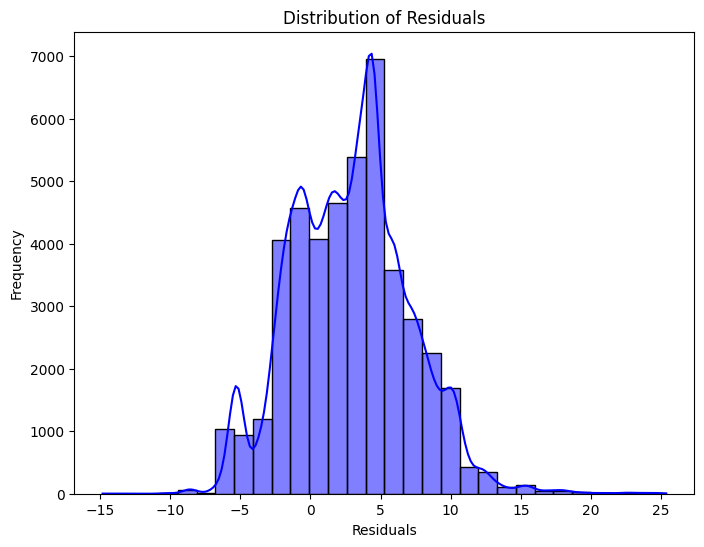

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_rf_oversampled, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [53]:
print("Length of y_test:", len(y_test))
print("Length of y_pred_rf:", len(y_pred_rf_oversampled))


Length of y_test: 44474
Length of y_pred_rf: 44474


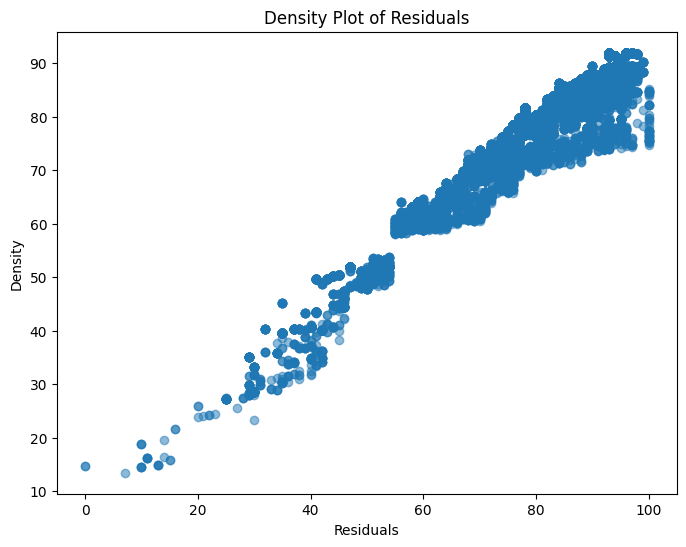

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_oversampled, alpha=0.5)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


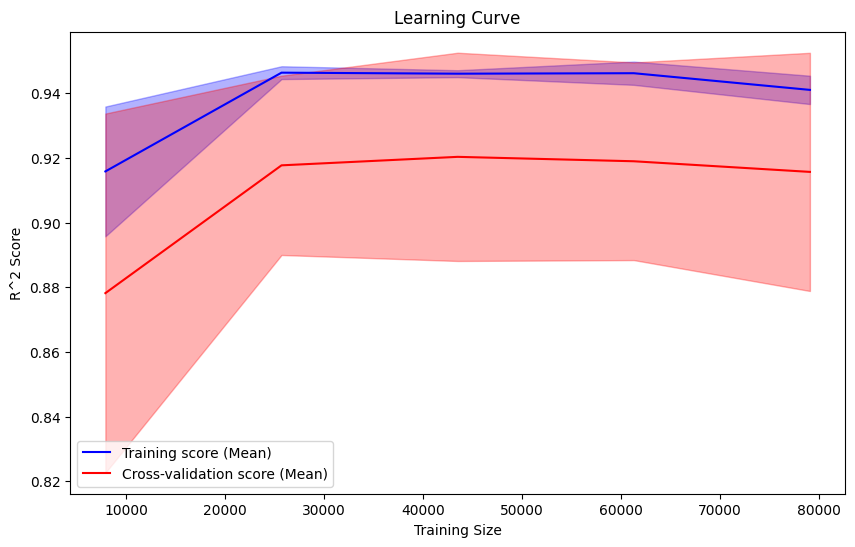

In [55]:

# # Kiểm tra overfitting bằng việc vẽ Learning Curve
# from sklearn.model_selection import learning_curve
# import numpy as np

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2')

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, label='Training score', color='blue')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.3)
# plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.3)
# plt.title('Learning Curve')
# plt.xlabel('Training Size')
# plt.ylabel('R^2 Score')
# plt.legend()
# plt.show()
# Kiểm tra overfitting bằng việc vẽ Learning Curve
from sklearn.model_selection import learning_curve
import numpy as np

# Training and cross-validation scores for different training sizes
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2'
)

# Calculate mean and standard deviation for both training and cross-validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create the learning curve plot
plt.figure(figsize=(10, 6))

# Plot the mean and standard deviation of training scores
plt.plot(
    train_sizes, train_mean, label='Training score (Mean)', color='blue'
)
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.3
)

# Plot the mean and standard deviation of cross-validation scores
plt.plot(
    train_sizes, test_mean, label='Cross-validation score (Mean)', color='red'
)
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.3
)

# Add labels and title
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R^2 Score')
plt.legend()

# Display the plot
plt.show()


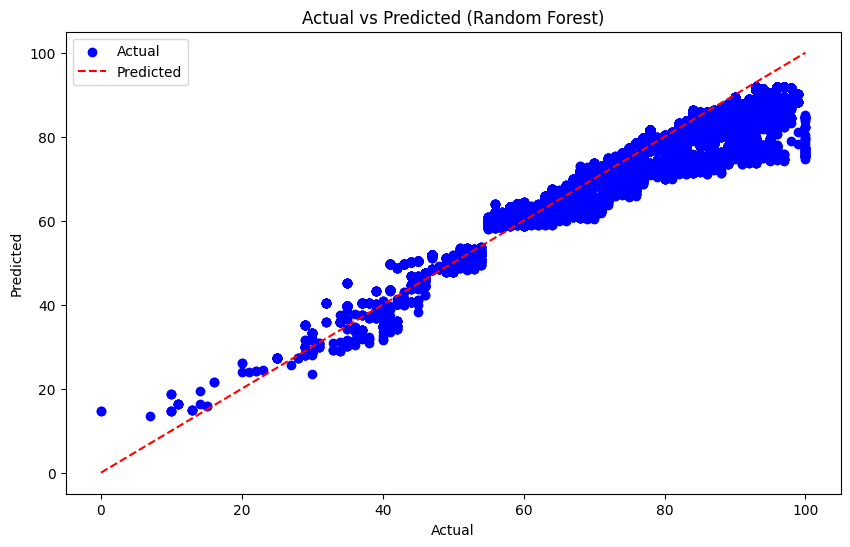

In [56]:
# Vẽ biểu đồ kết hợp đường cho dự đoán và thực tế từ mô hình Random Forest
plt.figure(figsize=(10, 6))

# Vẽ điểm thực tế
plt.scatter(y_test, y_pred_rf_oversampled, color='blue', label='Actual')

# Vẽ đường dự đoán
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Predicted')

plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

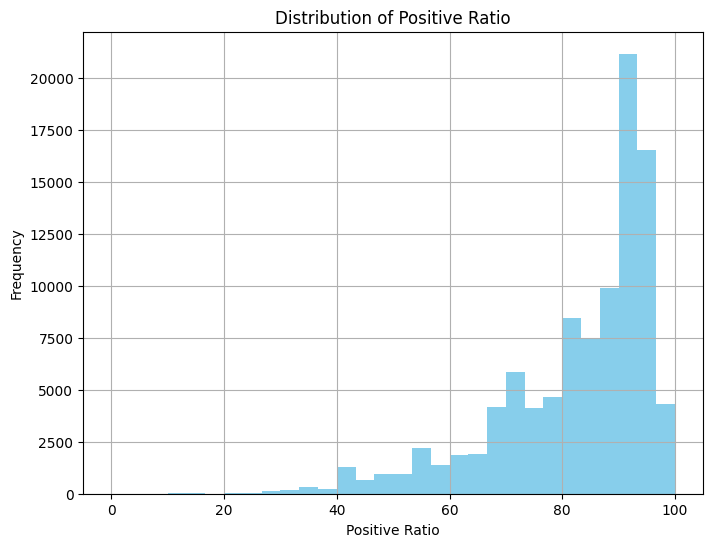

In [57]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân bố dữ liệu của cột 'positive_ratio'
plt.figure(figsize=(8, 6))
plt.hist(merged_df['positive_ratio'], bins=30, color='skyblue')
plt.title('Distribution of Positive Ratio')
plt.xlabel('Positive Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


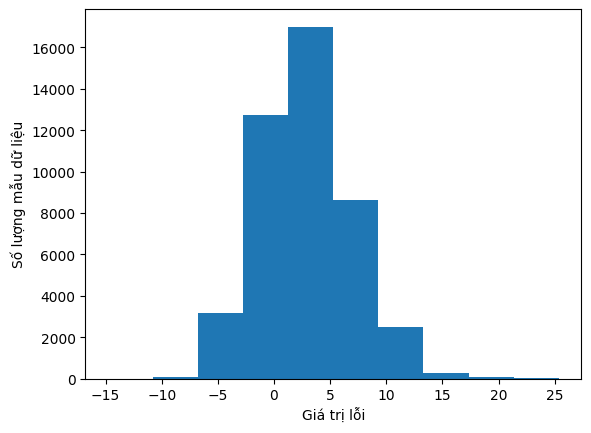

In [58]:
plt.hist(y_test - y_pred_rf_oversampled)
plt.xlabel('Giá trị lỗi')
plt.ylabel('Số lượng mẫu dữ liệu')
plt.show()

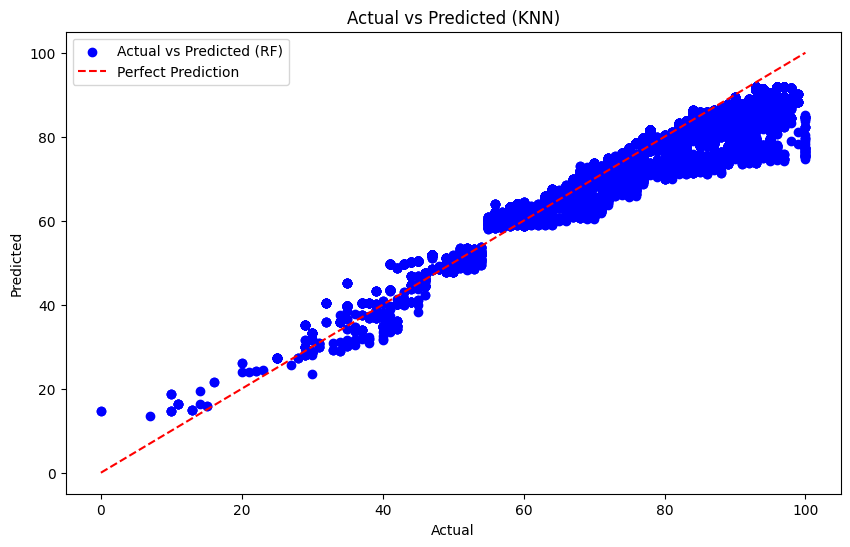

In [60]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_rf_oversampled, color='blue', label='Actual vs Predicted (RF)')

# Plotting the diagonal line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted (KNN)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()